## Logistic Regression Project Exercise 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('../DATA/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

In [ ]:
# Exploratory Data Analysis and Vidualizations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='target', ylabel='count'>

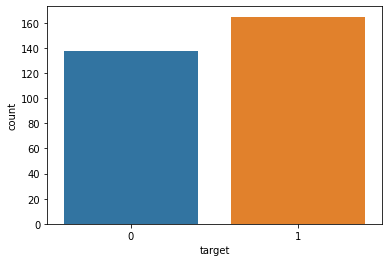

In [7]:
sns.countplot(data = df, x = 'target')

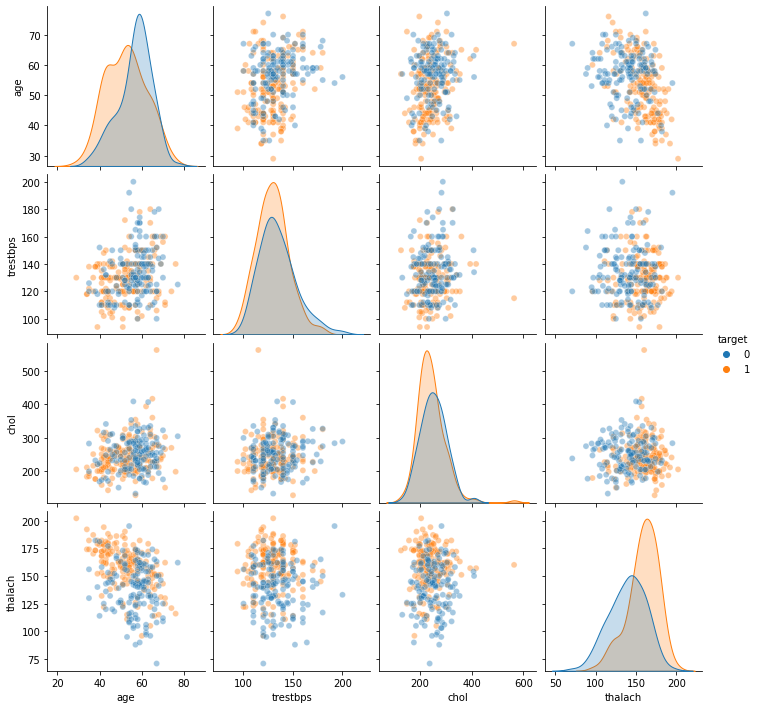

In [8]:
var = ['age','trestbps', 'chol','thalach']
sns.pairplot(data = df, vars = var, hue = 'target', plot_kws = dict(alpha = 0.4))

<AxesSubplot:>

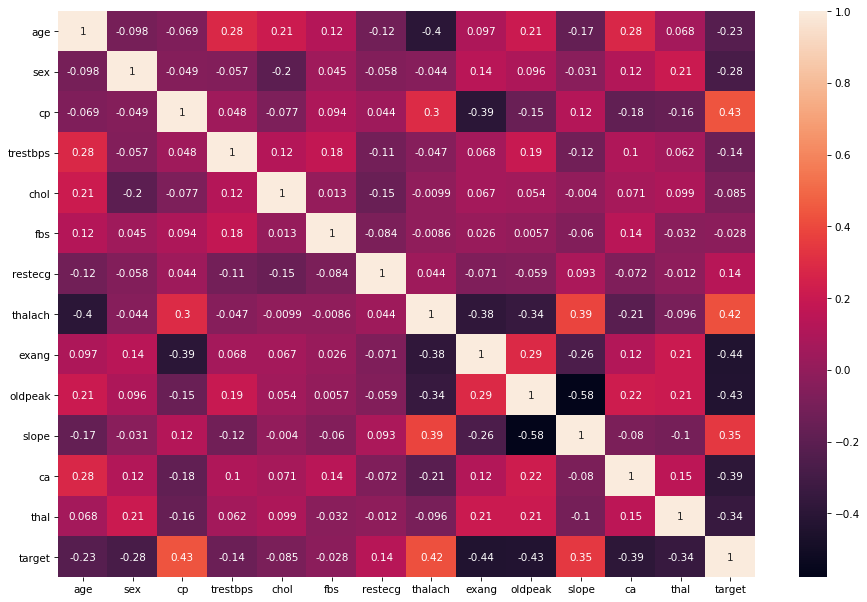

In [9]:
# heatmap that displays the correlation between all the columns
plt.figure(figsize = (15,10), dpi = 75)
sns.heatmap(data = df.corr(), annot = True)

In [ ]:
# Machine Learning

In [10]:
X = df.drop(labels  = 'target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
# Train Test split & Scaling

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression model and using Cross-Validation to find a well-performing C value for the hyper-parameter search. 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [18]:
log_model = LogisticRegression(max_iter = 10000)

In [19]:
l1_ratio = np.linspace(0,1,11)
C = np.logspace(-4,4,100)
params = [{'penalty': ['l1'], 'solver': ['liblinear','saga'], 'C' : C},
          {'penalty': ['l2'], 'solver': ['newton-cg','lbfgs','sag','saga'], 'C' : C},
          {'penalty': ['elasticnet'], 'solver': ['saga'], 'C' : C, 'l1_ratio' : l1_ratio}]

In [20]:
C

array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-03, 5.99484250e-03, 7.22080902e-03,
       8.69749003e-03, 1.04761575e-02, 1.26185688e-02, 1.51991108e-02,
       1.83073828e-02, 2.20513074e-02, 2.65608778e-02, 3.19926714e-02,
       3.85352859e-02, 4.64158883e-02, 5.59081018e-02, 6.73415066e-02,
       8.11130831e-02, 9.77009957e-02, 1.17681195e-01, 1.41747416e-01,
       1.70735265e-01, 2.05651231e-01, 2.47707636e-01, 2.98364724e-01,
       3.59381366e-01, 4.32876128e-01, 5.21400829e-01, 6.28029144e-01,
       7.56463328e-01, 9.11162756e-01, 1.09749877e+00, 1.32194115e+00,
       1.59228279e+00, 1.91791026e+00, 2.31012970e+00, 2.78255940e+00,
      

In [21]:
grid = GridSearchCV(estimator = log_model, param_grid = params)

In [22]:
grid.fit(Scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid=[{'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-0...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                          'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'penalty': ['elasticnet'], 'solver': ['saga']}])

In [ ]:
# Fitting Logistic Regression model with the best paramters

In [23]:
if 'l1_ratio' in grid.best_params_:
    pass
else:
    grid.best_params_['l1_ratio'] = None

In [24]:
grid.best_params_

{'C': 0.7564633275546291,
 'penalty': 'l1',
 'solver': 'liblinear',
 'l1_ratio': None}

In [25]:
log_model_hyper = LogisticRegression(C =  grid.best_params_['C'], l1_ratio = grid.best_params_['l1_ratio'], penalty = grid.best_params_['penalty'], max_iter = 10000, solver = grid.best_params_['solver'])

In [26]:
log_model_hyper.fit(Scaled_X_train, y_train)

LogisticRegression(C=0.7564633275546291, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [27]:
# Model Coefficients
log_model_hyper.coef_

array([[-0.03817464, -0.66395666,  0.87118028, -0.22814387, -0.17228145,
         0.        ,  0.09049519,  0.41757711, -0.40196453, -0.52461398,
         0.34284855, -0.819417  , -0.55553323]])

In [28]:
log_model_hyper.get_params()

{'C': 0.7564633275546291,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Barplot of coeffients of the features

In [29]:
new_df = pd.DataFrame()
new_df['features'] = df.columns.drop('target').transpose()
new_df['coefs'] = log_model_hyper.coef_.transpose()
new_df = new_df.sort_values(by = ['coefs'])

<AxesSubplot:xlabel='features', ylabel='coefs'>

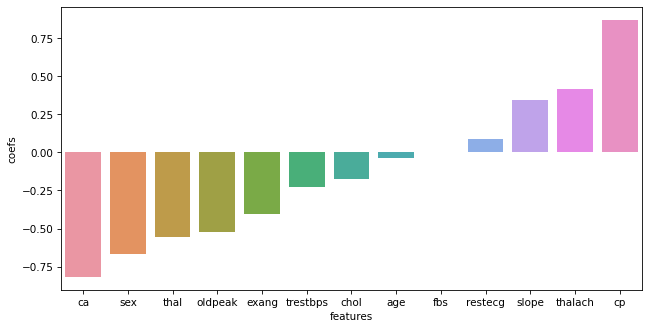

In [30]:
plt.figure(figsize = (10,5), dpi = 75)
sns.barplot(data = new_df, x = 'features', y = 'coefs')

In [ ]:
# Model performace evaluation

In [31]:
y_pred = log_model_hyper.predict(Scaled_X_test)

In [32]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [33]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

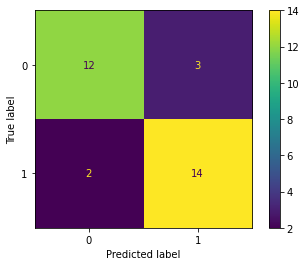

In [34]:
plot_confusion_matrix(log_model_hyper, Scaled_X_test, y_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [ ]:
# Performance curves

In [36]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

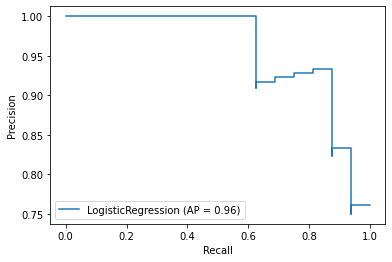

In [37]:
plot_precision_recall_curve(log_model_hyper, Scaled_X_test, y_test)

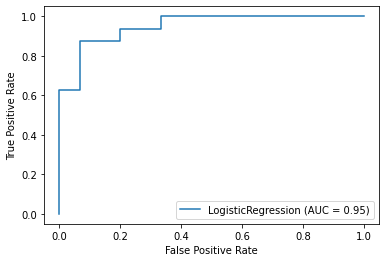

In [38]:
plot_roc_curve(log_model_hyper, Scaled_X_test, y_test)

In [ ]:
# Predicting for an unseen patient

In [39]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [40]:
log_model_hyper.predict(patient)

array([0], dtype=int64)

In [41]:
log_model_hyper.predict_proba(patient)

array([[1.00000000e+00, 2.98815049e-16]])

In [42]:
# Saving model
from joblib import dump, load

In [43]:
dump(log_model_hyper, 'final_heart_disease_model.joblib')

['final_heart_disease_model.joblib']